## Importing the required packages

In [728]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Loading in the data

In [729]:
df1 = pd.read_excel("May 17- June 14 Vaccine Random sample.xlsx","Sheet1")
df2 = pd.read_excel("June 15 - July 12 Vaccine Random Sample.xlsx","Sheet1")
df3 = pd.read_excel("July13-August11 Vaccine Random Sample.xlsx","Sheet1")
df4 = pd.read_excel("August12-September10 Vaccine Random Sample.xlsx","Sheet1")
df5 = pd.read_excel("September11-October10 Vaccine Random Sample.xlsx","Sheet1")
df_final = pd.concat([df1,df2,df3,df4,df5])
print(df_final.columns)


Index(['GEOCODING TYPE', 'TWEET_ID', 'KEYWORD', 'CITY', 'CREATED_AT',
       'CREATED_AT_LOCAL', 'TEXT', 'Result', 'FROM_USER', 'FROM_USER_NAME',
       'LOCATION', 'URLS', 'HASHTAGS', 'IS_RETWEET', 'RETWEET_COUNT',
       'FOLLOWERS_COUNT', 'FRIENDS_COUNT', 'STATUSES_COUNT', 'TIME_ZONE',
       'GEO', 'COORDINATES', 'PLACE_FULLNAME', 'PLACE_COUNTRYCODE',
       'PLACE_TYPE', 'PLACE_BBOX', 'PLACE_GEO', 'TO_USER_NAME',
       'IN_REPLY_TO_STATUS_ID', 'SOURCE', 'LANGUAGE', 'IS_VALID_ONLY_FOR_FLU',
       'GEOCODE_ENGINE', 'GEOCODE_TYPE', 'PROFILE_GEO', 'PROFILE_LEVEL',
       'FINAL_GEO', 'rand'],
      dtype='object')


## Visualizing the manually classified tweet distribution

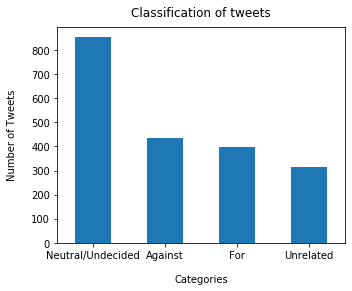

In [730]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

df_final['Result'].value_counts().plot(kind='bar',figsize=(4,3), rot=0)
plt.xlabel("Categories", labelpad=14)
plt.ylabel("Number of Tweets", labelpad=14)
plt.title("Classification of tweets", y=1.02);

### Leaving these many Neutral/Undecided values will skew the model. Lets bring its population down to about 450 and balance the class distribution

In [731]:
df_final['Result'].value_counts()

Neutral/Undecided    854
Against              434
For                  398
Unrelated            313
Name: Result, dtype: int64

In [732]:
x = df_final[df_final['Result']=='Neutral/Undecided']
x = x[0:450]
df_final = df_final[df_final['Result']!='Neutral/Undecided']
df_final = pd.concat([df_final,x])

In [733]:
df_final['Result'].value_counts()

Neutral/Undecided    450
Against              434
For                  398
Unrelated            313
Name: Result, dtype: int64

## The classes are much more balanced. Lets train the model now

In [734]:
df_final = df_final.sample(frac=1)

In [735]:
df_final['Result']

45                   For
272            Unrelated
27                   For
301    Neutral/Undecided
161                  For
210                  For
395              Against
376              Against
314              Against
89                   For
279                  For
376    Neutral/Undecided
146              Against
298                  For
5                    For
22             Unrelated
305                  For
301                  For
128    Neutral/Undecided
85                   For
82               Against
188            Unrelated
34     Neutral/Undecided
333              Against
322                  For
299                  For
304              Against
363    Neutral/Undecided
164                  For
116            Unrelated
352              Against
391                  For
6                    For
166            Unrelated
45     Neutral/Undecided
149              Against
32                   For
141                  For
190    Neutral/Undecided
108                  For


In [736]:
Sent_Analysis = df_final[['TEXT','Result']]
train, test = train_test_split(Sent_Analysis, train_size=.85, test_size=.15,random_state=0)

### Creating a pipeline

In [737]:
classifier = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(1,3))),
    ('tfidf', TfidfTransformer()),
    ('classifier', RandomForestClassifier(random_state=1,n_estimators=10))
])

In [738]:
train = train.values.astype(str)
train = pd.DataFrame(train)
test = test.values.astype(str)
test = pd.DataFrame(test)

In [739]:
classifier.fit(train[0], train[1])

Pipeline(memory=None,
         steps=[('vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 3), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabula...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                

In [740]:
# try it out on some sample tweets
texts = test[0]

outputs = classifier.predict(texts)

pd.set_option('display.max_rows', None)
resultdf = pd.DataFrame()
resultdf['Text']=texts
resultdf['ResultPred']=outputs
resultdf['ResultAct'] = test[1]
resultdf

,Text,ResultPred,ResultAct
0,@aslam_bagudu @JoeBiden That takes time. They'...,Against,Neutral/Undecided
1,@ABC Hell no! I‚Äôm not taking that vaccine.,Against,Against
2,@wolfejosh I listened to an interview he just ...,Neutral/Undecided,Neutral/Undecided
3,@SethAbramson One thing that doesn‚Äôt track f...,Against,Neutral/Undecided
4,@SteveFDA Dr Hahn when are you going to allow ...,Neutral/Undecided,Unrelated
5,@vanster11 My friend who is an NP said she tho...,For,Unrelated
6,@TrumpRulzz If they force the vaccine on Every...,Against,Against
7,$OGEN plans to MANUFACTURE their vaccine and ...,Neutral/Undecided,Neutral/Undecided
8,@noahsmom7 My governor says we won‚Äôt fully o...,Against,Neutral/Undecided
9,@PoliticalEye17 @jim_desmond @CBS8 Fighting th...,Against,Neutral/Undecided


## Lets plot to see the difference in model performance vs actual tag given

Text(0.5, 0, 'Categories')

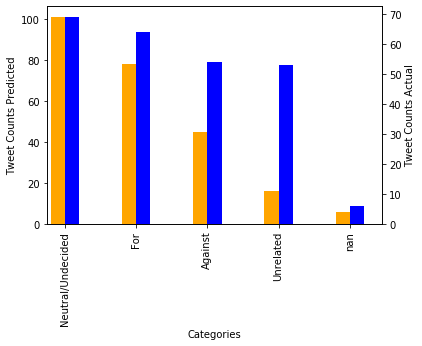

In [741]:
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.2

resultdf['ResultPred'].value_counts().plot(kind='bar', color='orange', ax=ax, width=width, position=1)
resultdf['ResultAct'].value_counts().plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

ax.set_ylabel('Tweet Counts Predicted')
ax2.set_ylabel('Tweet Counts Actual')
ax.set_xlabel("Categories")

# Marginally alright results, still misclassifies about half the data. 

In [742]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

actual_dummy= pd.get_dummies(data=resultdf['ResultAct'], columns=['For','Neutral/Undecided','Against','Unrelated'])
pred_dummy= pd.get_dummies(data=resultdf['ResultPred'], columns= ['For','Neutral/Undecided','Against','Unrelated'])

print("the F1 Score is",f1_score(actual_dummy, pred_dummy, average="macro"))
print("the accuracy score is",accuracy_score(actual_dummy,pred_dummy))
print("The precision score is",precision_score(actual_dummy, pred_dummy, average="macro"))
print("The recall is",recall_score(actual_dummy, pred_dummy, average="macro"))

the F1 Score is 0.5139506874716122
the accuracy score is 0.4146341463414634
The precision score is 0.5857315731573157
The recall is 0.5227286710418375
